In [1]:
import os

import pandas as pd

import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map

import nimare
from nimare.meta.cbma import ALE
from nimare.tests.utils import get_test_data_path
from nimare.transforms import ImagesToCoordinates, ImageTransformer

/home/psadil/anaconda3/envs/meta/lib/python3.9/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [7]:
d = pd.read_csv('../tmp.csv')
def as_dict(d):
  ds = {
    d.exp: {
      'contrasts': {
        "1": {
          "images": {
            'z': d.z
            },
            "metadata": {
              "sample_sizes": [d.n_sub]
              } 
            }
          }
        }
      }

  return ds

x = {}
for row in d.itertuples():
  x.update(as_dict(row))

x

{'study-1_nsub-10_nstudy-10_iter-1': {'contrasts': {'1': {'images': {'z': 'data-raw/niis/nstudy-10_nsub-10_study-1_iter-1_z.nii.gz'},
    'metadata': {'sample_sizes': [10]}}}},
 'study-2_nsub-10_nstudy-10_iter-1': {'contrasts': {'1': {'images': {'z': 'data-raw/niis/nstudy-10_nsub-10_study-2_iter-1_z.nii.gz'},
    'metadata': {'sample_sizes': [10]}}}},
 'study-3_nsub-10_nstudy-10_iter-1': {'contrasts': {'1': {'images': {'z': 'data-raw/niis/nstudy-10_nsub-10_study-3_iter-1_z.nii.gz'},
    'metadata': {'sample_sizes': [10]}}}},
 'study-4_nsub-10_nstudy-10_iter-1': {'contrasts': {'1': {'images': {'z': 'data-raw/niis/nstudy-10_nsub-10_study-4_iter-1_z.nii.gz'},
    'metadata': {'sample_sizes': [10]}}}},
 'study-5_nsub-10_nstudy-10_iter-1': {'contrasts': {'1': {'images': {'z': 'data-raw/niis/nstudy-10_nsub-10_study-5_iter-1_z.nii.gz'},
    'metadata': {'sample_sizes': [10]}}}},
 'study-6_nsub-10_nstudy-10_iter-1': {'contrasts': {'1': {'images': {'z': 'data-raw/niis/nstudy-10_nsub-10_study-6_

In [8]:
dset = nimare.dataset.Dataset(x, mask="/home/psadil/fsl/data/standard/MNI152_T1_2mm_brain_mask.nii.gz")
dset.update_path(new_path="..")
dset.images

INFO:nimare.utils:Shared path detected: '/home/psadil/Documents/git/meta/data-raw/niis/'


,id,study_id,contrast_id,z__relative,z
0,study-10_nsub-10_nstudy-10_iter-1-1,study-10_nsub-10_nstudy-10_iter-1,1,nstudy-10_nsub-10_study-10_iter-1_z.nii.gz,/home/psadil/Documents/git/meta/data-raw/niis/...
1,study-1_nsub-10_nstudy-10_iter-1-1,study-1_nsub-10_nstudy-10_iter-1,1,nstudy-10_nsub-10_study-1_iter-1_z.nii.gz,/home/psadil/Documents/git/meta/data-raw/niis/...
2,study-2_nsub-10_nstudy-10_iter-1-1,study-2_nsub-10_nstudy-10_iter-1,1,nstudy-10_nsub-10_study-2_iter-1_z.nii.gz,/home/psadil/Documents/git/meta/data-raw/niis/...
3,study-3_nsub-10_nstudy-10_iter-1-1,study-3_nsub-10_nstudy-10_iter-1,1,nstudy-10_nsub-10_study-3_iter-1_z.nii.gz,/home/psadil/Documents/git/meta/data-raw/niis/...
4,study-4_nsub-10_nstudy-10_iter-1-1,study-4_nsub-10_nstudy-10_iter-1,1,nstudy-10_nsub-10_study-4_iter-1_z.nii.gz,/home/psadil/Documents/git/meta/data-raw/niis/...
5,study-5_nsub-10_nstudy-10_iter-1-1,study-5_nsub-10_nstudy-10_iter-1,1,nstudy-10_nsub-10_study-5_iter-1_z.nii.gz,/home/psadil/Documents/git/meta/data-raw/niis/...
6,study-6_nsub-10_nstudy-10_iter-1-1,study-6_nsub-10_nstudy-10_iter-1,1,nstudy-10_nsub-10_study-6_iter-1_z.nii.gz,/home/psadil/Documents/git/meta/data-raw/niis/...
7,study-7_nsub-10_nstudy-10_iter-1-1,study-7_nsub-10_nstudy-10_iter-1,1,nstudy-10_nsub-10_study-7_iter-1_z.nii.gz,/home/psadil/Documents/git/meta/data-raw/niis/...
8,study-8_nsub-10_nstudy-10_iter-1-1,study-8_nsub-10_nstudy-10_iter-1,1,nstudy-10_nsub-10_study-8_iter-1_z.nii.gz,/home/psadil/Documents/git/meta/data-raw/niis/...
9,study-9_nsub-10_nstudy-10_iter-1-1,study-9_nsub-10_nstudy-10_iter-1,1,nstudy-10_nsub-10_study-9_iter-1_z.nii.gz,/home/psadil/Documents/git/meta/data-raw/niis/...


In [4]:
# delete coordinates for study
dset.coordinates

,id,study_id,contrast_id,x,y,z,space


In [5]:
# There is only one study contrast with coordinates, but no images
print(f"studies with only coordinates: {set(dset.coordinates['id']) - set(dset.images['id'])}\n")

print(f"studies with only images: {set(dset.images['id']) - set(dset.coordinates['id'])}\n")

# the images dataframe has z maps as one of the columns
print(f"columns in images dataframe: {dset.images.columns}\n")

# there is no z_stat column in the coordinates dataframe
print(f"columns in coordinates dataframe: {dset.coordinates.columns}\n")

studies with only coordinates: set()

studies with only images: {'study-9_nsub-10_nstudy-10_iter-1-1', 'study-8_nsub-10_nstudy-10_iter-2-1', 'study-6_nsub-10_nstudy-10_iter-1-1', 'study-8_nsub-10_nstudy-10_iter-1-1', 'study-10_nsub-10_nstudy-10_iter-1-1', 'study-10_nsub-10_nstudy-10_iter-2-1', 'study-4_nsub-10_nstudy-10_iter-1-1', 'study-4_nsub-10_nstudy-10_iter-2-1', 'study-1_nsub-10_nstudy-10_iter-1-1', 'study-9_nsub-10_nstudy-10_iter-2-1', 'study-3_nsub-10_nstudy-10_iter-1-1', 'study-7_nsub-10_nstudy-10_iter-2-1', 'study-5_nsub-10_nstudy-10_iter-1-1', 'study-6_nsub-10_nstudy-10_iter-2-1', 'study-7_nsub-10_nstudy-10_iter-1-1', 'study-1_nsub-10_nstudy-10_iter-2-1', 'study-2_nsub-10_nstudy-10_iter-2-1', 'study-3_nsub-10_nstudy-10_iter-2-1', 'study-2_nsub-10_nstudy-10_iter-1-1', 'study-5_nsub-10_nstudy-10_iter-2-1'}

columns in images dataframe: Index(['id', 'study_id', 'contrast_id', 'z__relative', 'z'], dtype='object')

columns in coordinates dataframe: Index(['id', 'study_id', 'contr

In [11]:
coord_replace = ImagesToCoordinates(merge_strategy="replace", z_threshold=1, remove_subpeaks=True)
dset_replace = coord_replace.transform(dset)

In [13]:
dset_replace.coordinates

,id,study_id,contrast_id,x,y,z,space,z_stat
0,study-10_nsub-10_nstudy-10_iter-1-1,study-10_nsub-10_nstudy-10_iter-1,1,40.0,-46.0,-20.0,mni152_2mm,5.081163
538,study-10_nsub-10_nstudy-10_iter-1-1,study-10_nsub-10_nstudy-10_iter-1,1,12.0,-104.0,-26.0,mni152_2mm,1.099675
539,study-10_nsub-10_nstudy-10_iter-1-1,study-10_nsub-10_nstudy-10_iter-1,1,-18.0,-50.0,-72.0,mni152_2mm,1.099486
540,study-10_nsub-10_nstudy-10_iter-1-1,study-10_nsub-10_nstudy-10_iter-1,1,-44.0,-8.0,-48.0,mni152_2mm,1.098719
541,study-10_nsub-10_nstudy-10_iter-1-1,study-10_nsub-10_nstudy-10_iter-1,1,-30.0,-60.0,26.0,mni152_2mm,1.098493
...,...,...,...,...,...,...,...,...
7560,study-9_nsub-10_nstudy-10_iter-1-1,study-9_nsub-10_nstudy-10_iter-1,1,-54.0,44.0,-6.0,mni152_2mm,1.319184
7561,study-9_nsub-10_nstudy-10_iter-1-1,study-9_nsub-10_nstudy-10_iter-1,1,-78.0,-16.0,16.0,mni152_2mm,1.318480
7562,study-9_nsub-10_nstudy-10_iter-1-1,study-9_nsub-10_nstudy-10_iter-1,1,42.0,-26.0,16.0,mni152_2mm,1.316143
7564,study-9_nsub-10_nstudy-10_iter-1-1,study-9_nsub-10_nstudy-10_iter-1,1,40.0,-56.0,-66.0,mni152_2mm,1.314728


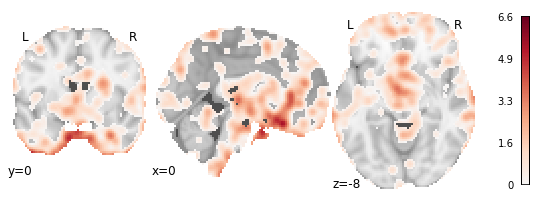

In [15]:
ale = ALE()
res_replace = ale.fit(dset_replace)
plot_stat_map(
    res_replace.get_map("z"), cut_coords=[0, 0, -8], draw_cross=False, cmap="RdBu_r"
)

In [30]:
res_replace.save_maps(prefix="prefix")

In [29]:
dset_replace.save("dset.pklz")